In [20]:

import pandas as pd

df = pd.read_csv("C:/Users/DELL/Downloads/surv_variants.csv")
df.head()




,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925


In [21]:
df.isnull().sum()



Country             0
first_seq           0
num_seqs            0
last_seq            0
variant             0
censure_date        0
duration            0
censored            0
mortality_rate      0
total_cases         0
total_deaths        0
growth_rate       528
dtype: int64

In [22]:
df.dtypes

Country            object
first_seq          object
num_seqs            int64
last_seq           object
variant            object
censure_date       object
duration            int64
censored             bool
mortality_rate    float64
total_cases       float64
total_deaths      float64
growth_rate       float64
dtype: object

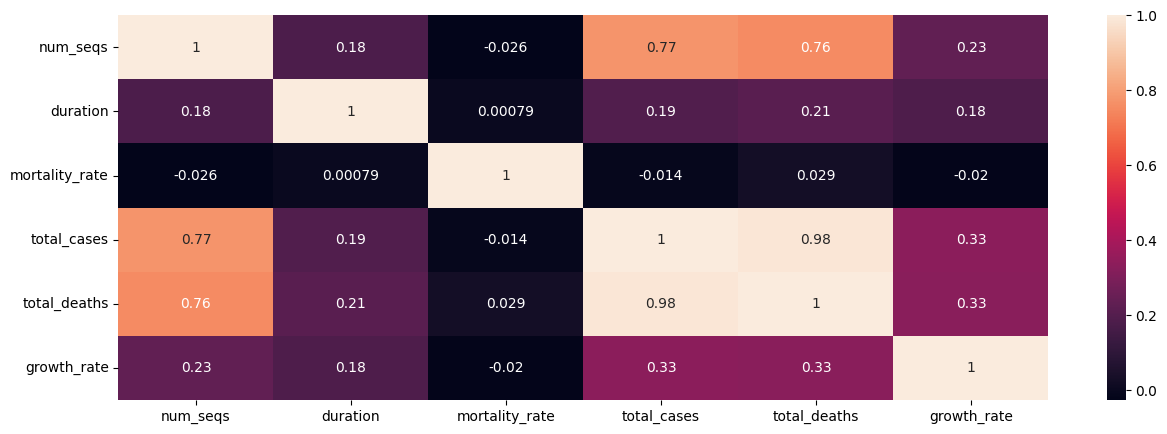

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df.corr(), annot=True)
plt.show()

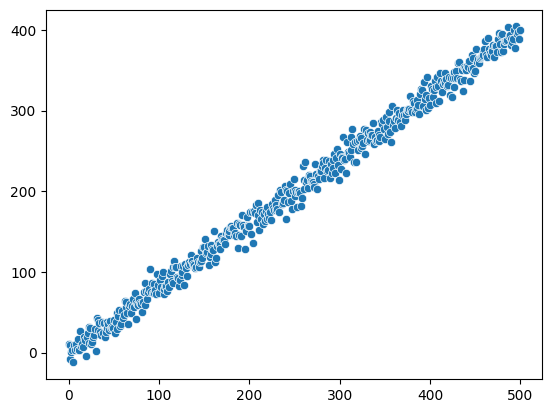

array([[1.        , 0.99637894],
       [0.99637894, 1.        ]])

In [24]:
import numpy as np

x = np.arange(500)
noise = np.random.normal(0,10,500)
y = 0.8*x + noise
sns.scatterplot(x =x, y = y)
plt.show()
corr = np.corrcoef(x,y)
corr



In [25]:
# SUPPORT VECTOR MACHINES
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)
iris.feature_names

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
df.head()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
df['target'] = iris.target
df.describe().T
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


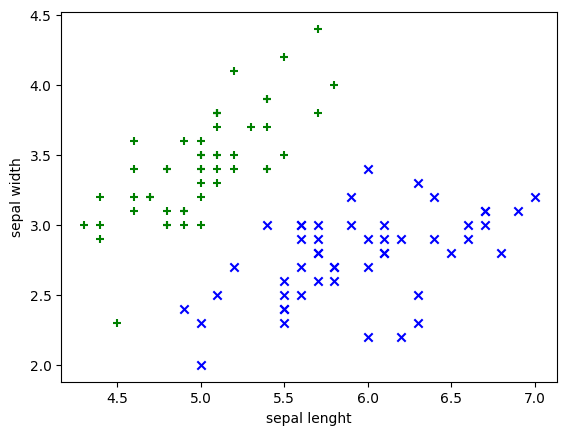

In [28]:
# Checking for classification using scatter plot for the different flowers
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

plt.scatter(x= df0['sepal length (cm)'], y = df0['sepal width (cm)'], marker='+', color = 'green')
plt.scatter(x= df1['sepal length (cm)'], y = df1['sepal width (cm)'], marker='x', color = 'blue')
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')

plt.show()



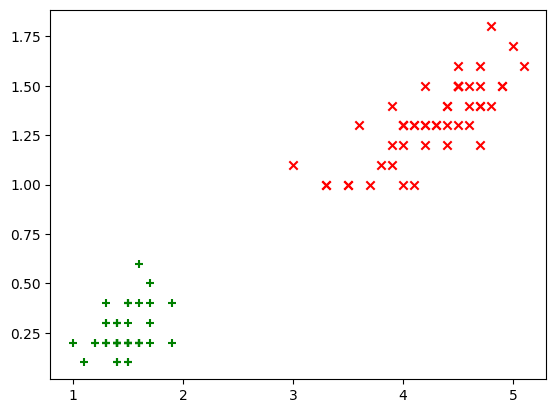

In [29]:

plt.scatter(x= df0['petal length (cm)'], y = df0['petal width (cm)'], marker='+', color = 'green')
plt.scatter(x= df1['petal length (cm)'], y = df1['petal width (cm)'], marker='x', color = 'red')
plt.show()

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
# Building a model
'''SVM (Support Vector Machine) is the overall machine learning algorithm used for classification and regression tasks.'''
from sklearn.model_selection import train_test_split

x = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)



In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9666666666666667

In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]])

In [34]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test,y_test)


1.0